# Spectrum Generation

We use the data to generate spectra for the incidence of particles on the detector

In [4]:
#Include modules
from accelerate import *
from tqdm.notebook import tqdm

%matplotlib widget

In [14]:
import os

# Parameters
run = 'C1_Window'
SOURCE = 'Co60'

# Find the files in subfolders
foldername = '../data/' + SOURCE
filenames = []
for dirpath, dirnames, filenames_in_dir in os.walk(foldername):
    for filename in filenames_in_dir:
        filenames.append(os.path.join(dirpath, filename))

# Print the number of files found
print(f'Found {len(filenames)} data files in {foldername} and its subfolders')


Found 24577 data files in ../data/Co60 and its subfolders


In [15]:
#List of possible materials
FerroanNoriticAnorthosite = {
    'name' : 'Ferroan Noritic Anorthosite',
    'peaks' : {
        'Fe\nKa' : 6.40,
        'Ti\nKa' : 4.51,
        'Si\nKa' : 1.74,
        'Al\nKa' : 1.49,
        'Mg\nKa' : 1.25,
        'O\nKa'  : 0.52,
        'Mn\nKa' : 5.90,
        'Ca\nKa' : 3.69,
        'Na\nKa' : 1.04,
        'K\nKa'  : 3.31,
        'Cr\nKa' : 5.41,
        'Sr\nKa' : 14.16,
    }
}

Basalt = {
    'name' : 'Basalt',
    'peaks' : {
        'Fe\nKa' : 6.40,
        'Fe\nKb' : 7.06,
        'Ti\nKa' : 4.51,
        'Ti\nKb' : 4.93,
        'Si\nKa' : 1.74,
        'Al\nKa' : 1.49,
        'Mg\nKa' : 1.25,
        'O\nKa'  : 0.52,
    }
}

PigeoniteBasalt = {
    'name' : 'Pigeonite Basalt',
    'peaks' : {                
        'O\nKa'  : 0.52,
        'Si\nKa' : 1.74,
        'Ti\nKa' : 4.51,
        'Al\nKa' : 1.49,
        'Fe\nKa' : 6.40,
        'Mn\nKa' : 5.90,
        'Mg\nKa' : 1.25,
        'Ca\nKa' : 3.69,
        'Na\nKa' : 1.04,
        'K\nKa'  : 3.31,
        'P\nKa'  : 2.01,
        'S\nKa'  : 2.30,
        'V\nKa'  : 4.95,
        'Cr\nKa' : 5.41,
        'Sr\nKa' : 14.16,
        'Zr\nKa' : 15.78,

    }
}

ImpactMeltBreccia = {
    'name' : 'Impact Melt Breccia',
    'peaks' : {                
        'O\nKa'  : 0.52,
        'Si\nKa' : 1.74,
        'Ti\nKa' : 4.51,
        'Al\nKa' : 1.49,
        'Fe\nKa' : 6.40,
        'Mn\nKa' : 5.90,
        'Mg\nKa' : 1.25,
        'Ca\nKa' : 3.69,
        'Na\nKa' : 1.04,
        'K\nKa'  : 3.31,
        'P\nKa'  : 2.01,
        'Cr\nKa' : 5.41,
        'Sr\nKa' : 14.16,
        'Ni\nKa' : 7.48,
        'Ba\nKa' : 32.19,


    }
}

Vacuum:   0%|          | 0/6 [00:00<?, ?it/s]

loadFile:   0%|          | 0/4096 [00:00<?, ?it/s]

getEnergy:   0%|          | 0/4096 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/4096 [00:00<?, ?it/s]

loadFile:   0%|          | 0/4096 [00:00<?, ?it/s]

getEnergy:   0%|          | 0/4096 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/4096 [00:00<?, ?it/s]

loadFile:   0%|          | 0/4096 [00:00<?, ?it/s]

getEnergy:   0%|          | 0/4096 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/4096 [00:00<?, ?it/s]

loadFile:   0%|          | 0/4096 [00:00<?, ?it/s]

getEnergy:   0%|          | 0/4096 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/4096 [00:00<?, ?it/s]

loadFile:   0%|          | 0/4096 [00:00<?, ?it/s]

getEnergy:   0%|          | 0/4096 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/4096 [00:00<?, ?it/s]

loadFile:   0%|          | 0/4096 [00:00<?, ?it/s]

getEnergy:   0%|          | 0/4096 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/4096 [00:00<?, ?it/s]

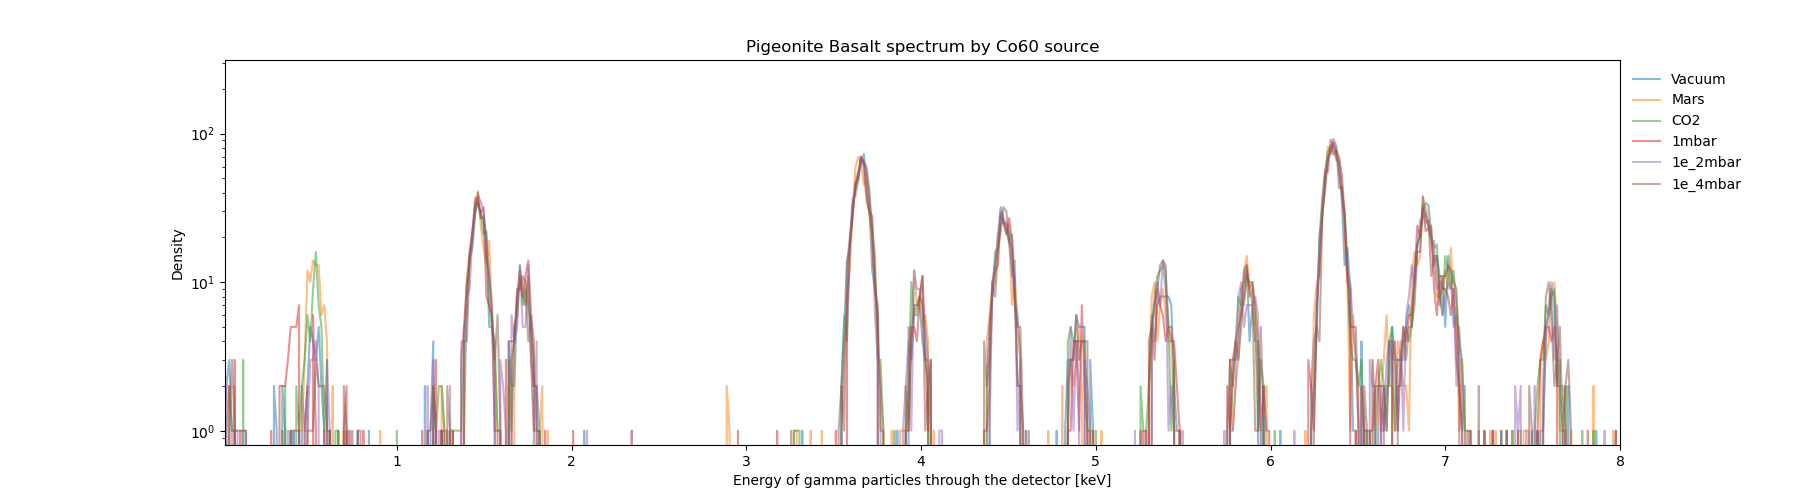

In [16]:
TESTS = ['Vacuum', 'Mars', 'CO2', '1mbar', '1e_2mbar', '1e_4mbar']

RUN_STRUCTURE = {test : test for test in TESTS}

MATERIAL = PigeoniteBasalt

STD                 = 0.04
particleEnergyList  = {}
PARTICLES           = ['gamma']
# EFFICIENCY          = pd.read_csv('./data/SDD_Efficiency/C1.csv', names=['Energy','Efficiency'])
EFFICIENCY = None

# For all the simulation runs
pbar = tqdm(RUN_STRUCTURE,desc=list(RUN_STRUCTURE.values())[0])

fig = None
ax = None

for i,run in enumerate(pbar):
    # Collect their output files
    files = loadFiles([filename for filename in filenames if run in filename])
    # print(files)
    

    # Extract the energy for each particle
    particleEnergyList[run] = getParticleEnergiesSmeared(files,
        smearfunc   = smear_gaussian,
        size        = STD,
        groupBy     = 'TrackID',
        columnName  = 'InitialEnergy'
        )
    
    particles = None
    try:
        particles = pd.concat([particleEnergyList[run][p] for p in PARTICLES])
    except:
        pass
    
    # Plot the spectrum
    if particles is not None : 
            
        fig, ax, histogram, bins = plotParticleHistogram(particles,
        source          = SOURCE,
        PARTICLE        = ' and '.join(PARTICLES),
        MATERIAL        = MATERIAL,
        SHOW_MATERIAL   = False,
        LIMS            = (0,8),
        MAX_PEAKS       = 0,
        NBINS           = 500,
        SAVE            = True,
        yscale          = 'log',
        efficiency      = EFFICIENCY,
        fig             = fig,
        ax              = ax,
        label           = RUN_STRUCTURE[run])
     

    # Change the description of the progress bar to show the material processed
    try:
        pbar.set_description(list(RUN_STRUCTURE.values())[i+1])
    except:
        pass

In [5]:
print("The unique particles are:")
for run in particleEnergyList:
    print(f'{run}:',[[particle, len(particleEnergyList[run][particle])] for particle in particleEnergyList[run]])

The unique particles are:
Vacuum: [['gamma', 17700], ['e-', 5689], ['alpha', 2], ['neutron', 2]]
Mars: [['e-', 69967], ['gamma', 18707], ['neutron', 6], ['alpha', 12]]
CO2: [['e-', 82895], ['gamma', 18120], ['neutron', 7], ['alpha', 11]]
1mbar: [['gamma', 17761], ['e-', 34312], ['alpha', 4], ['neutron', 5]]
1e_2mbar: [['e-', 8755], ['gamma', 17632], ['neutron', 3], ['alpha', 2]]
1e_4mbar: [['gamma', 17264], ['e-', 5751], ['neutron', 2]]
